In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
import os, urllib
import tarfile
download_root = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
housing_path = os.path.join('zestwy danych', 'mieszkania')
housing_url = download_root + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(url = housing_url, path = housing_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgzpath = os.path.join(path, 'housing.tgz')
    urllib.request.urlretrieve(url, tgzpath)
    housing_tgz = tarfile.open(tgzpath)
    housing_tgz.extractall(path = path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
#Loading data
def load_housing_data(path = housing_path):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)    

In [6]:
houses = load_housing_data()
#First 5 records of data
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
houses['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [60]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c971543c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c936fb908>]], dtype=object)

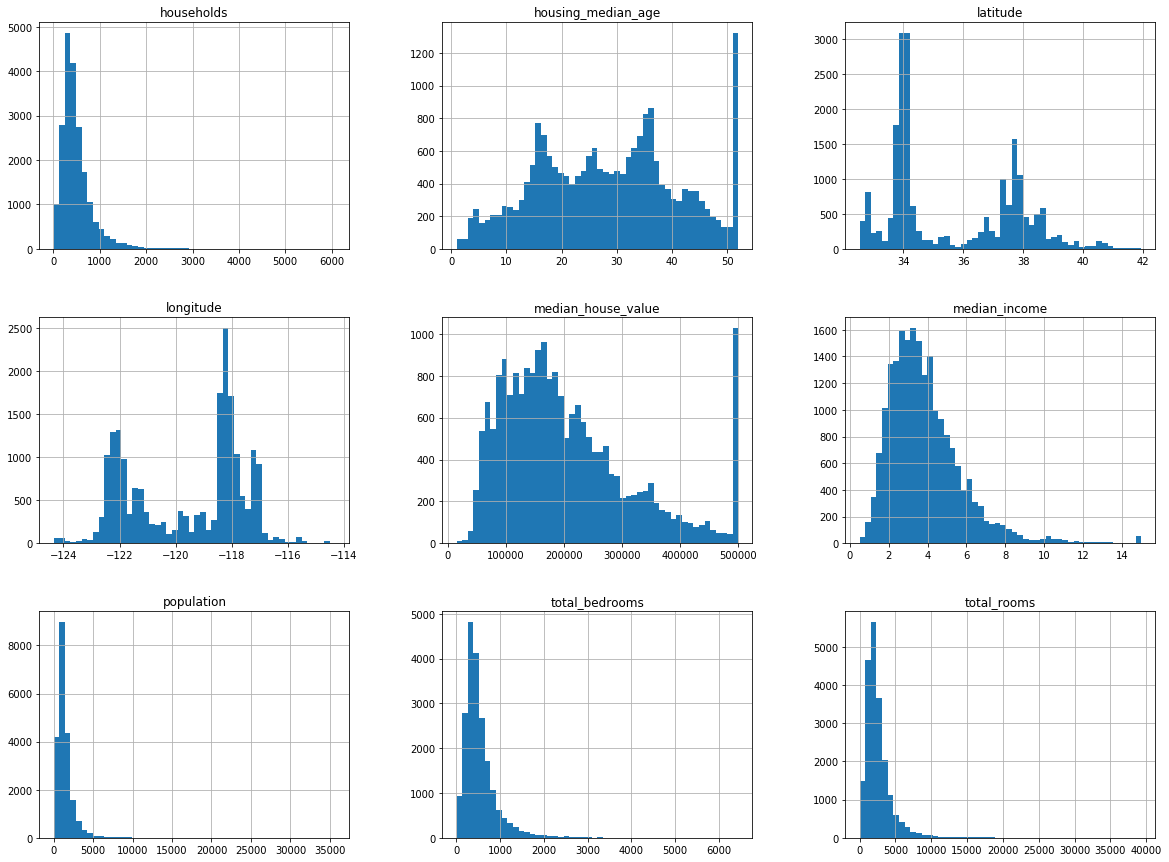

In [10]:
%matplotlib inline
houses.hist(bins = 50, figsize = (20,15))

In [11]:
# Not ideal, Every time running different test and train data is selected.
def split_data(data, ratio):
    random_indices = np.random.permutation(len(data))
    test_size = int(len(data) * ratio)
    test_indices = random_indices[:test_size]
    train_indices = random_indices[test_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [12]:
test_data, train_data = split_data(houses, 0.2)

In [13]:
#Improived version of testing and train data every time same data is selected
import hashlib
def test_set_check(identifier, test_ratio, hash_):
    return hash_(np.int64(identifier)).digest()[-1] < 256 * test_ratio 

def split_train_test_by_id(data, test_ratio, id_column, hash_ = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash_))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = houses.reset_index() # Adding index column

In [15]:
train_data, test_data = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [16]:
#Using scikit-learn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(houses, test_size = 0.2, random_state = 42)

In [17]:
#Split median income into 5 categories.
houses['income_cat'] = np.ceil(houses['median_income'] / 1.5)
houses['income_cat'].where(houses['income_cat'] < 5, 5.0, inplace = True)

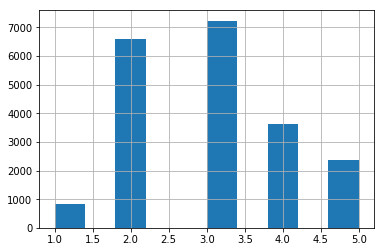

In [18]:
houses['income_cat'].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
#Class that help split train and test data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [21]:
#Spliting test and train data based on added column income_cat
for test_index, train_index in split.split(houses, houses['income_cat']):
    strat_train_set = houses.loc[train_index]
    strat_test_set = houses.loc[test_index]

In [22]:
# strat_train_set

In [23]:
houses['income_cat'].value_counts() / len(houses)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [25]:
#Copy of training set
train_set_copy = strat_train_set.copy()

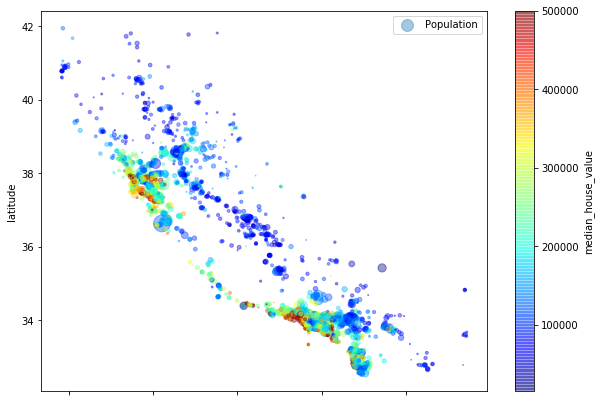

In [26]:
train_set_copy.plot(kind = 'scatter', x = 'longitude', y = 'latitude', 
                    alpha = 0.4, s = train_set_copy['population'] / 100,
                    label = 'Population', c = 'median_house_value', 
                    cmap = plt.cm.get_cmap('jet'), figsize = (10,7))

In [27]:
corr_matrix = train_set_copy.corr()

In [28]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c84d96b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c842d2b38>]], dtype=object)

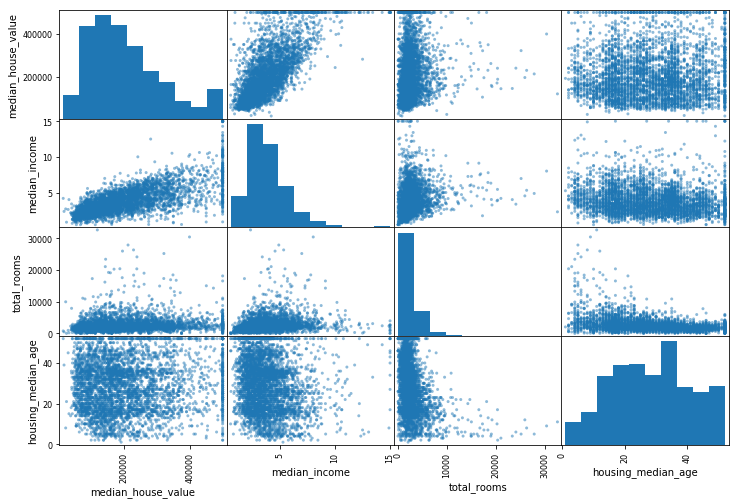

In [29]:
from pandas.plotting import scatter_matrix
atribbiutes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set_copy[atribbiutes], figsize = (12,8))

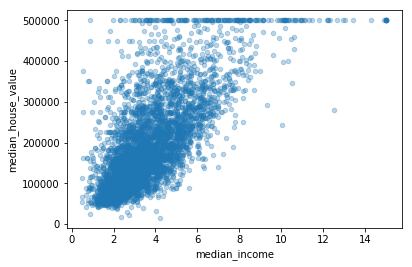

In [30]:
train_set_copy.plot(kind = 'scatter', x = 'median_income', y='median_house_value', alpha = 0.3 )

In [31]:
train_set_copy['Rooms_per_family'] = train_set_copy['total_rooms'] / train_set_copy['households']
train_set_copy['Bedrooms_per_house'] = train_set_copy['total_bedrooms'] / train_set_copy['total_rooms']
train_set_copy['Population_in_family'] = train_set_copy['population'] / train_set_copy['households']

In [32]:
corr_matrix = train_set_copy.corr()

In [33]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.691831
Rooms_per_family        0.192575
total_rooms             0.131435
housing_median_age      0.071357
households              0.071242
total_bedrooms          0.057568
population             -0.016033
longitude              -0.039987
Population_in_family   -0.135142
latitude               -0.150124
Bedrooms_per_house     -0.240362
Name: median_house_value, dtype: float64

In [34]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [35]:
#Filling unknown data
from sklearn.preprocessing import Imputer

In [36]:
imputer = Imputer(strategy = 'median')

In [66]:
#We can calculate only numeric values so we dropping ocen_proximity
houses_num = housing.drop('ocean_proximity', axis = 1)

In [38]:
#Calculating medians 
imputer.fit(houses_num)
imputer.statistics_

array([ -118.455  ,    34.22   ,    28.     ,  2158.5    ,   441.     ,
        1172.     ,   416.     ,     3.51475])

In [40]:
X = imputer.transform(houses_num)
houses_tr = pd.DataFrame(X, columns=houses_num.columns)

In [41]:
#Unknown data has been replaced with median
houses_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 8 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4128 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
dtypes: float64(8)
memory usage: 258.1 KB


In [67]:
#Changing ocean proximity to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
houses_cat = housing['ocean_proximity']
houses_cat_encoded = encoder.fit_transform(houses_cat)
#Printing numbers
print(f'Ocean proximity categories: {houses_cat_encoded}')
#Printing Categories
print(f'Ocean proxmity classes: {encoder.classes_}')

Ocean proximity categories: [0 0 0 ..., 0 1 1]
Ocean proxmity classes: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [69]:
#Changing list into matrix using one-hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
houses_cat_encoded_1hot = encoder.fit_transform(houses_cat_encoded.reshape(-1,1))
print(houses_cat_encoded_1hot.toarray())

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]]


In [83]:
#Doing previous task all in once
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
houses_cat_encoded_1hot = encoder.fit_transform(houses_cat)

In [84]:
#Creating cumstom transforming functin
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room    
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        rooms_per_family = X[:, 3] / X[:, 6]
        population_per_family = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_family, population_per_family, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_family, population_per_family]
        
attrAdder = CombinedAttributesAdder()
houses_extra_attr = attrAdder.transform(houses.values)

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [86]:
houses_num_tr = num_pipeline.fit_transform(houses_num)

In [87]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y= None):
        return X[self.attribute_names].values

In [88]:
num_attibs = list(houses_num)
cat_attrib = ['ocean_proximity']

num_Pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attibs)),
    ('imputer', Imputer(strategy = 'median')),
    ('attrribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# cat_Pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attrib)),
#     ('LabelEncoder', LabelEncoder()),
#     ('cat_attrib', OneHotEncoder()),
# ])
# print(cat_Pipeline.fit_transform(housing))

In [89]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_Pipeline),
#     ('cat_pipeline', cat_Pipeline),
])

In [90]:
housing_prepered = full_pipeline.fit_transform(housing)
print(housing_prepered)

[[ 0.57471497 -0.69620912  0.03285951 ...,  0.73090182 -0.43707996
  -0.8842083 ]
 [ 0.83839441 -0.86074221  0.82471029 ...,  0.55147147 -0.25483994
  -0.8762043 ]
 [ 0.24635944 -0.65390061 -0.12551065 ..., -0.22492016 -0.35271202
  -0.02496691]
 ..., 
 [ 0.52496413 -0.66800344  0.19122966 ..., -0.48888899 -0.50176243
   0.08016752]
 [ 1.10704893 -0.75732141 -0.12551065 ...,  0.63227321 -0.06103921
  -0.90599188]
 [ 0.31601062  0.55894333 -0.75899128 ...,  8.13018121 -0.39763381
  -0.21111508]]


In [92]:
housing_prepered = np.c_[housing_prepered, houses_cat_encoded_1hot]

In [96]:
housing_prepered.shape

(4128, 16)